>## importando imagens

In [3]:
import os
BASE_PATH = './grape_base/'
classes = os.listdir(BASE_PATH)
print(classes)

['black_measles', 'valid', 'leaf_blight', 'black_rot', 'sample', 'healthy']


In [4]:
black_measles_imgs = os.listdir(BASE_PATH+'black_measles')
black_measles_imgs = [BASE_PATH+'black_measles/'+img for img in black_measles_imgs]

leaf_blight_imgs = os.listdir(BASE_PATH+'leaf_blight')
leaf_blight_imgs = [BASE_PATH+'leaf_blight/'+img for img in leaf_blight_imgs]

black_rot_imgs = os.listdir(BASE_PATH+'black_rot')
black_rot_imgs = [BASE_PATH+'black_rot/'+img for img in black_rot_imgs]

healthy_imgs = os.listdir(BASE_PATH+'healthy')
healthy_imgs = [BASE_PATH+'healthy/'+img for img in healthy_imgs]

In [6]:
print(len(black_measles_imgs))
print(len(leaf_blight_imgs))
print(len(black_rot_imgs))
print(len(healthy_imgs))

1920
1722
1888
1692


In [31]:
def plot_HSV(img_path):
    img = cv2.imread(img_path)

    plt.figure(figsize=(16,16))
    plt.subplot(1,4,1)
    plt.title('Original')
    plt.imshow(img[:,:,::-1])
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2]

    plt.gray()
    plt.subplot(1,4,2)
    plt.title('matriz H')
    plt.imshow(H) #matiz refletância do objeto

    plt.subplot(1,4,3)
    plt.title('matriz S')
    plt.imshow(S) #saturação quão longe os pixels estão do branco(ou preto)

    plt.subplot(1,4,4)
    plt.title('matriz V')
    plt.imshow(V) #brilho
    
    plt.show()
    plt.close('all')

In [335]:
def plot_BGR(img_path):
    img = cv2.imread(img_path)

    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]

    plt.figure(figsize=(16,16))
    plt.subplot(1,4,1)
    plt.title('Original')
    plt.imshow(img[:,:,::-1])

    plt.gray()
    plt.subplot(1,4,2)
    plt.title('Matriz B')
    plt.imshow(B)

    plt.subplot(1,4,3)
    plt.title('Matriz G')
    plt.imshow(G)

    plt.subplot(1,4,4)
    plt.title('Matriz R')
    plt.imshow(R)
    
    plt.show()
    plt.close('all')

In [399]:
import cv2
import matplotlib.pyplot as plt

def plot_image_list(images_list, size_a=16, size_b=16):
    
    lines = (len(images_list)//4)+1
    plt.figure(figsize=(size_a, size_b))
    
    for i in range(len(images_list)):
        img = cv2.imread(images_list[i])
        plt.subplot(lines,4,i+1)
        plt.imshow(img[:,:,::-1])
        #plt.title(str(i+1))
    
    plt.show()
    plt.close('all')

In [66]:
def plot_image(image_path, invert=False):
    img = cv2.imread(image_path)
    
    plt.figure(figsize=(4,4))
    
    if(invert):
        plt.imshow(img[:,:,::-1])
    else:
        plt.imshow(img)
    
    plt.show()
    plt.close('all')

black_measles


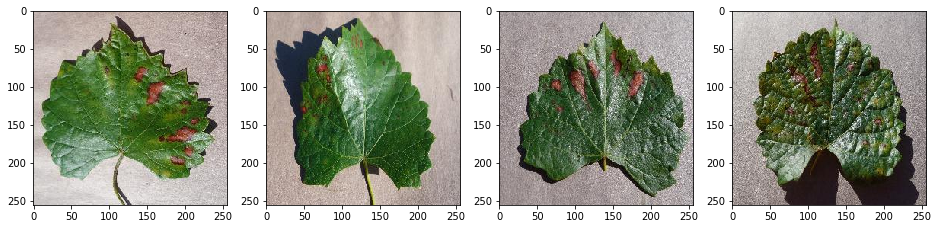

leaf_blight


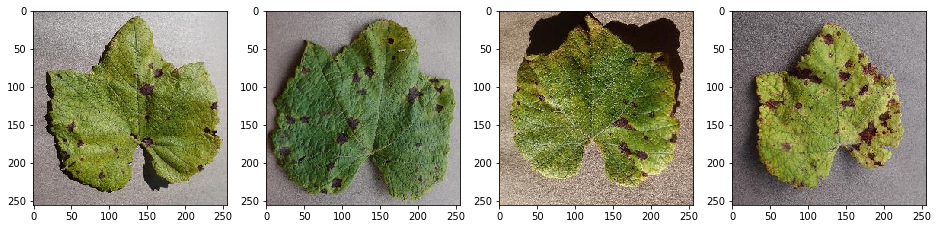

black_rot


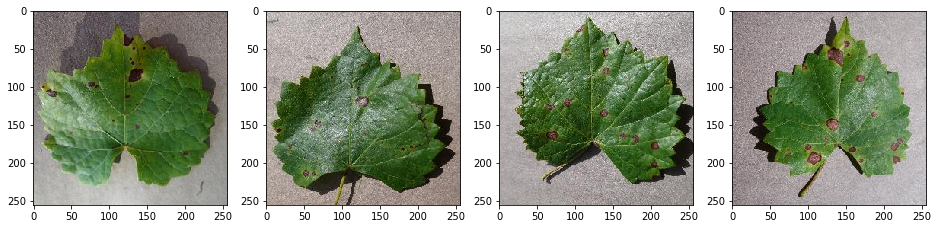

healthy


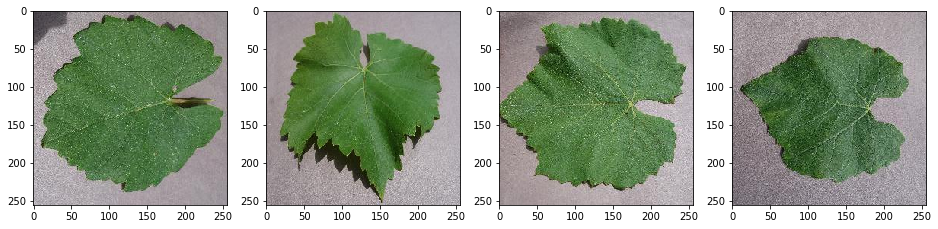

In [30]:
print('black_measles')
plot_image_list(black_measles_imgs[:4])
print('leaf_blight')
plot_image_list(leaf_blight_imgs[:4])
print('black_rot')
plot_image_list(black_rot_imgs[:4])
print('healthy')
plot_image_list(healthy_imgs[:4])

>## Filtro para segmentação

para as folhas saudáveis para verificar de G é maior que R e B

In [513]:
def plot_matrix_list(images_list, size_a=16, size_b=16):
    
    lines = (len(images_list)//4)+1
    plt.figure(figsize=(size_a, size_b))
    
    for i in range(len(images_list)):
        plt.subplot(lines,4,i+1)
        plt.imshow(images_list[i])
        #plt.title(str(i+1))
        
    
    plt.show()
    plt.close('all')

In [528]:
import numpy as np
#leaf_blight
def aplica_filtro(img_path): 
    img = cv2.imread(img_path)
    qtdeLinhas, qtdeColunas, c = img.shape
    W = np.zeros((qtdeLinhas,qtdeColunas))
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2]

    THR = 50

    for i in range(qtdeLinhas):
        for j in range(qtdeColunas):
            if(not(((S[i,j] < THR or V[i,j] < THR) or H[i,j] > 100) or (not(B[i,j] < 100)))):
                W[i,j] = 255

    return W

In [502]:
problematicas = [leaf_blight_imgs[2], leaf_blight_imgs[16], black_measles_imgs[1], black_measles_imgs[3], black_measles_imgs[10]]

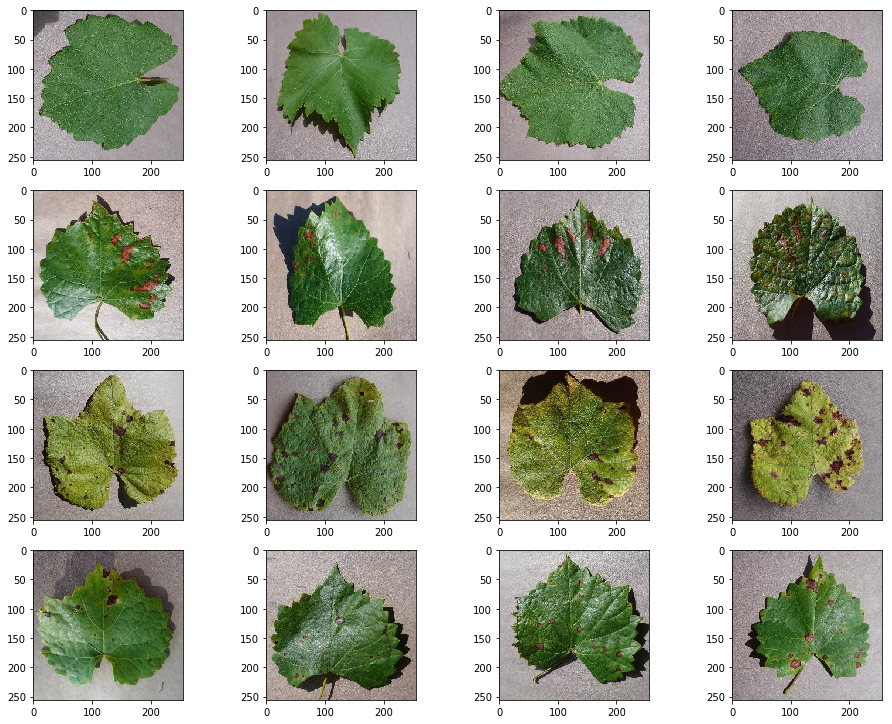

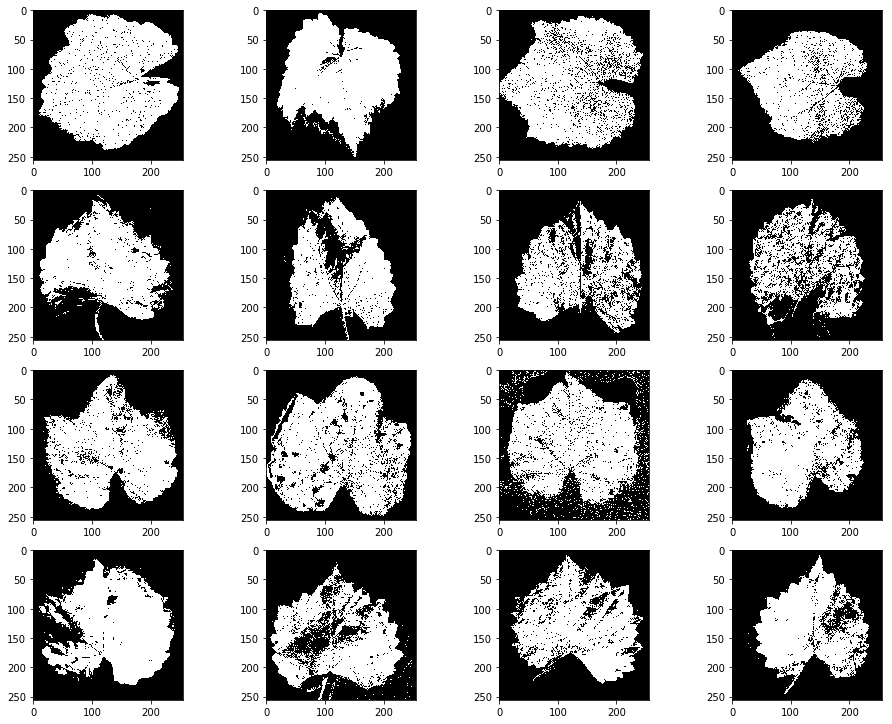

In [530]:
# black_measles_imgs[:4]
# leaf_blight_imgs[:4]
# black_rot_imgs[:4]
# healthy_imgs[:4]
a = healthy_imgs[:4]+black_measles_imgs[:4]+leaf_blight_imgs[:4]+black_rot_imgs[:4]

imgs_to_filter = a
plot_image_list(imgs_to_filter, 16, 16)

filters = []
for img in imgs_to_filter:
    filters.append(aplica_filtro(img))
    
plot_matrix_list(filters, 16, 16)